#Mohsin bin ramzan F22607016

# Loading the dataset and exploring data

In [ ]:

import pandas as pd
data = pd.read_csv('/content/mushrooms.csv')
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['class'].value_counts())


Dataset Head:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p         

# Visualize the Dataset Based on Class Labels

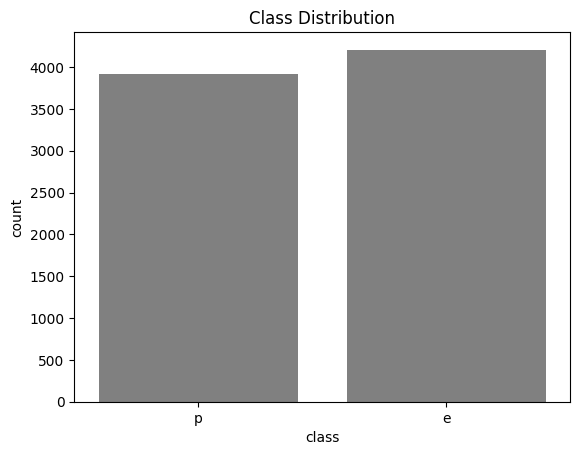

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=data ,color='gray')
plt.title("Class Distribution")
plt.savefig("class_distribution.png")
plt.show()


# Split the Dataset Using Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='class')
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (5686, 22)
Testing set size: (2438, 22)


#Preprocessing and Label Encoding to convert categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
for column in X.columns:
    X[column] = encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Preprocessing Complete.")


Data Preprocessing Complete.


#Applying Guassian Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Training and Prediction Complete.")


Model Training and Prediction Complete.


#EVALUATING THE MODEL

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           e       0.94      0.90      0.92      1263
           p       0.89      0.94      0.91      1175

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1134  129]
 [  76 1099]]
ROC curve is below the diagonal; flipping probabilities.

ROC AUC: 0.95


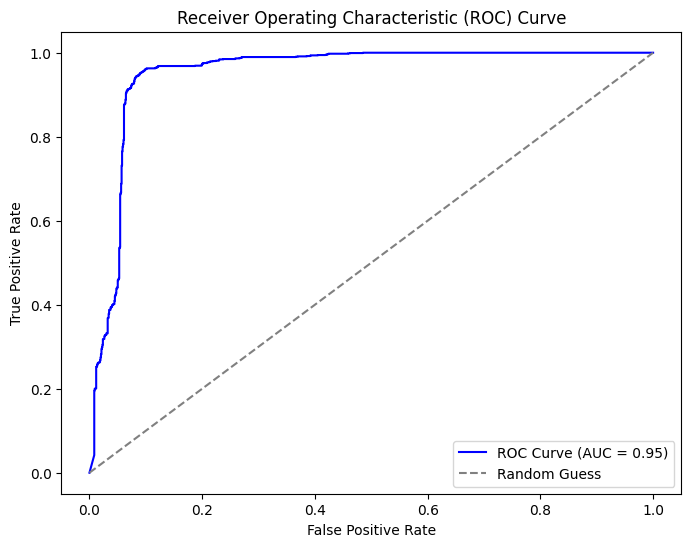

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

y_pred = model.predict(X_test)
y_pred_encoded = target_encoder.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=target_encoder.classes_))

conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
print("\nConfusion Matrix:")
print(conf_matrix)

y_prob = model.predict_proba(X_test)[:, 1]

positive_class_label = target_encoder.transform(['e'])[0]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob, pos_label=positive_class_label)
roc_auc = auc(fpr, tpr)

if roc_auc < 0.5:
    print("ROC curve is below the diagonal; flipping probabilities.")
    y_prob = 1 - y_prob
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob, pos_label=positive_class_label)
    roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc:.2f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()
